Library

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve

Data

In [2]:
#Import dataset
df1=pd.read_csv("Invistico_Airline.csv")
df1.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


Data Exploration

In [3]:
#number of rows and columns
df1.shape

(129880, 23)

In [4]:
#detect missing values
df1.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [5]:
#missing values in "Arrival Delay in Minutes"
df1.loc[df1['Arrival Delay in Minutes'].isnull()]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
145,satisfied,Female,Loyal Customer,21,Personal Travel,Eco,4804,0,2,0,...,5,5,4,1,4,2,3,5,20,NaN
246,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1364,0,3,0,...,4,2,1,1,3,4,3,2,0,NaN
710,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1792,0,5,0,...,5,5,4,4,5,3,4,5,24,NaN
736,satisfied,Male,Loyal Customer,9,Personal Travel,Eco,1862,0,5,0,...,3,3,5,3,4,4,4,3,0,NaN
818,dissatisfied,Male,Loyal Customer,9,Personal Travel,Eco,1668,1,0,1,...,4,4,4,5,1,5,1,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127739,satisfied,Male,Loyal Customer,44,Business travel,Business,3431,2,2,3,...,4,5,5,5,5,5,5,4,70,NaN
128131,satisfied,Male,Loyal Customer,39,Business travel,Business,1595,4,4,4,...,5,5,5,5,5,3,5,5,0,NaN
128710,satisfied,Female,Loyal Customer,45,Business travel,Eco,871,5,1,1,...,2,5,5,5,5,1,5,5,100,NaN
129774,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,1594,5,4,5,...,3,3,1,4,3,3,4,3,0,NaN


In [6]:
#drop data with missing values
df2=df1[~(df1['Arrival Delay in Minutes'].isnull())]
df2.shape

(129487, 23)

In [7]:
#count satisfaction
df2['satisfaction'].value_counts()

satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64

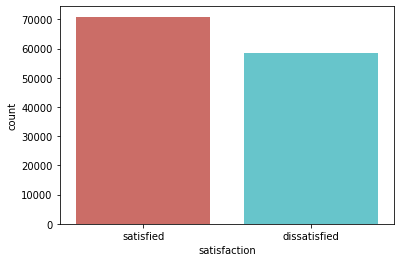

<Figure size 432x288 with 0 Axes>

In [8]:
#plot satisfaction
sns.countplot(x=df2['satisfaction'],palette='hls')
plt.show()
plt.savefig('count_satisfaction')

In [9]:
#percentage of satisfaction
count_satf=len(df2[df2['satisfaction']=='satisfied'])
count_dissatf=len(df2[df2['satisfaction']=='dissatisfied'])
pct_of_satf=count_satf/(count_satf+count_dissatf)
print("Percetage of Satisfied :",pct_of_satf*100 )
print("Percetage of Satisfied :",(1-pct_of_satf)*100 )

Percetage of Satisfied : 54.740630333547
Percetage of Satisfied : 45.259369666453


In [10]:
#exploration by mean
df2.groupby('satisfaction').mean()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,
dissatisfied,37.468373,2025.202833,2.467315,3.016517,2.660609,3.008003,2.919922,2.609044,2.959833,2.851873,2.972818,3.052555,3.364269,2.971845,3.377203,2.869653,17.728777,18.504599
satisfied,41.049604,1944.469640,3.145552,2.968582,3.010285,2.975805,3.521374,4.024266,3.983085,3.985031,3.872196,3.844587,3.969287,3.645721,3.977639,3.751799,12.092393,12.268883


In [11]:
#change satisfaction variable to binary, "1" means "satisfied" and "0" means dissatisfied
df2['Satisfaction']=df2['satisfaction'].apply(lambda x: 1 if x=='satisfied' else 0)
df3=df2.drop('satisfaction',axis=1)
df3.head()

<ipython-input-11-3d506256ba2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Satisfaction']=df2['satisfaction'].apply(lambda x: 1 if x=='satisfied' else 0)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,1
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,1
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,1
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,1
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,1


In [12]:
#unique elements in the gender variable
df3['Gender'].unique()

array(['Female', 'Male'], dtype=object)

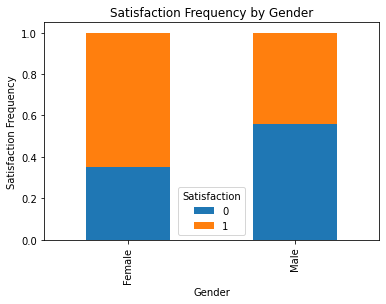

In [13]:
#visualization of Satisfaction Frequency by Gender
plot1=pd.crosstab(df3['Gender'],df3['Satisfaction'])
plot1.div(plot1.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Satisfaction Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Satisfaction Frequency')
plt.savefig('satisfac_freq_gender')

In [14]:
#unique elements in the Customer Type variable
df3['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

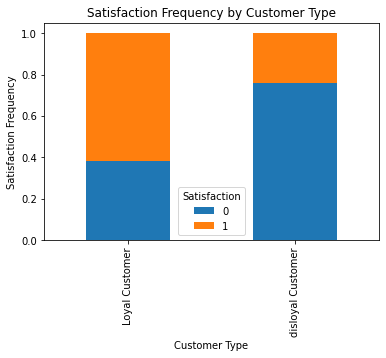

In [15]:
#visualization of Satisfaction Frequency by cs type
plot2=pd.crosstab(df3['Customer Type'],df3['Satisfaction'])
plot2.div(plot2.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Satisfaction Frequency by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Satisfaction Frequency')
plt.savefig('satisfac_freq_cstype')

In [16]:
#unique elements of the travel type variable
df3['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

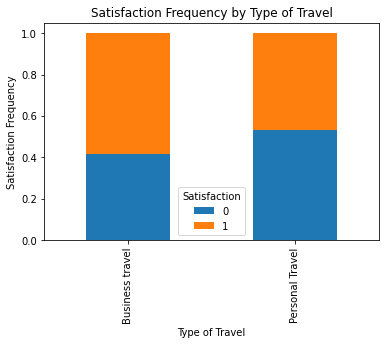

In [17]:
#visualization of Satisfaction Frequency by travel type
plot3=pd.crosstab(df3['Type of Travel'],df3['Satisfaction'])
plot3.div(plot3.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Satisfaction Frequency by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Satisfaction Frequency')
plt.savefig('satisfac_freq_traveltype')

In [18]:
#unique elements of class
df3['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

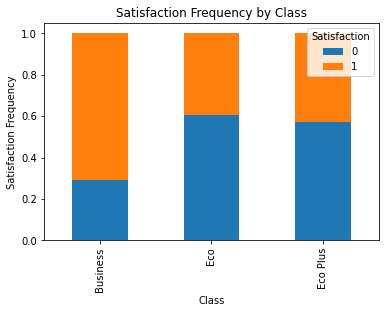

In [19]:
#visualization of Satisfaction Frequency by class
plot4=pd.crosstab(df3['Class'],df3['Satisfaction'])
plot4.div(plot4.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Satisfaction Frequency by Class')
plt.xlabel('Class')
plt.ylabel('Satisfaction Frequency')
plt.savefig('satisfac_freq_class')

In [20]:
#unique elements of age
df3['Age'].unique()

array([65, 47, 15, 60, 70, 30, 66, 10, 56, 22, 58, 34, 62, 35, 13, 52, 55,
       28,  9, 25, 53, 16, 64, 42, 21, 20, 26, 48, 57, 31, 17, 33, 32, 38,
       29, 24, 37,  7, 39, 11, 49,  8, 40, 45, 67, 59, 44, 69, 51, 18, 23,
       12, 46, 41, 54, 27, 63, 61, 36, 50, 68, 19, 14, 43, 72, 71, 80, 77,
       85, 78, 75, 79, 74, 73, 76], dtype=int64)

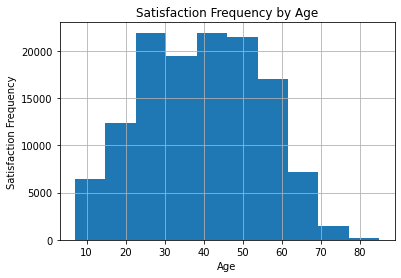

In [21]:
#visualization of age
df3['Age'].hist()
plt.title('Satisfaction Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Satisfaction Frequency')
plt.savefig('satisfac_freq_age')

In [22]:
#drop not good predictor
df4=df3.drop(['Gender','Type of Travel'],axis=1)
df4.head()

,Customer Type,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,Loyal Customer,65,Eco,265,0,0,0,2,2,4,...,3,3,0,3,5,3,2,0,0.0,1
1,Loyal Customer,47,Business,2464,0,0,0,3,0,2,...,3,4,4,4,2,3,2,310,305.0,1
2,Loyal Customer,15,Eco,2138,0,0,0,3,2,0,...,2,3,3,4,4,4,2,0,0.0,1
3,Loyal Customer,60,Eco,623,0,0,0,3,3,4,...,1,1,0,1,4,1,3,0,0.0,1
4,Loyal Customer,70,Eco,354,0,0,0,3,4,3,...,2,2,0,2,4,2,5,0,0.0,1


Create dummy variables

In [23]:
dummies1=pd.get_dummies(df4[['Customer Type','Class']])
dummies1.head()

,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,0,1,0
1,1,0,1,0,0
2,1,0,0,1,0
3,1,0,0,1,0
4,1,0,0,1,0


In [24]:
df5=pd.concat([df4.drop(['Customer Type','Class'],axis=1),dummies1],axis=1)
df5.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,3,2,0,0.0,1,1,0,0,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,3,2,310,305.0,1,1,0,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,4,2,0,0.0,1,1,0,0,1,0
3,60,623,0,0,0,3,3,4,3,1,...,1,3,0,0.0,1,1,0,0,1,0
4,70,354,0,0,0,3,4,3,4,2,...,2,5,0,0.0,1,1,0,0,1,0


Over-sampling using SMOTE

In [25]:
#create independen and dependen variable
X=df5.drop(['Satisfaction'],axis=1)
y=df5['Satisfaction']

In [26]:
smo=SMOTE(random_state=0)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
column=X_train.columns

smo_data_X,smo_data_y=smo.fit_resample(X_train,y_train)
smo_data_X=pd.DataFrame(data=smo_data_X,columns=column)
smo_data_y=pd.DataFrame(data=smo_data_y,columns=['Satisfaction'])

print("length of oversampled data is ", len(smo_data_X))
print("length of satisfied data is ", len(smo_data_y[smo_data_y['Satisfaction']==1]))
print("length of dissatisfied data is ", len(smo_data_X[smo_data_y['Satisfaction']==0]))

length of oversampled data is  113366
length of satisfied data is  56683
length of dissatisfied data is  56683


Recursive Feature Elimination

In [27]:
df5_vars=df5.columns.values.tolist()

In [28]:
y_2=['Satisfaction']
X_2=[i for i in df5_vars if i not in 'Satisfaction']

In [29]:
logreg=LogisticRegression()
rfe=RFE(logreg,20)
rfe=rfe.fit(smo_data_X,smo_data_y.values.ravel())

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: 

In [30]:
print(rfe.support_)
print(rfe.ranking_)
print(len(rfe.ranking_))

[ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False  True  True  True  True  True]
[1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1 1 1 1]
23


In [31]:
X_2

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Customer Type_Loyal Customer',
 'Customer Type_disloyal Customer',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus']

In [32]:
#RFE has helped to select the features
cols=['Age','Seat comfort','Departure/Arrival time convenient','Food and drink', 'Gate location',
 'Inflight wifi service','Inflight entertainment', 'Online support', 'Ease of Online booking',
 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
 'Cleanliness', 'Online boarding','Customer Type_Loyal Customer',
 'Customer Type_disloyal Customer', 'Class_Business', 'Class_Eco', 'Class_Eco Plus']
X_3=smo_data_X[cols]
y_3=smo_data_y['Satisfaction']

In [33]:
#Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y_3,X_3)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.461573
         Iterations 6
                                  Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.334      
Dependent Variable:       Satisfaction          AIC:                   104693.4348
Date:                     2021-11-29 11:26      BIC:                   104886.2023
No. Observations:         113366                Log-Likelihood:        -52327.    
Df Model:                 19                    LL-Null:               -78579.    
Df Residuals:             113346                LLR p-value:           0.0000     
Converged:                1.0000                Scale:                 1.0000     
No. Iterations:           6.0000                                                  
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------

In [34]:
#remove variable "Online boarding"
cols=['Age','Seat comfort','Departure/Arrival time convenient','Food and drink', 'Gate location',
 'Inflight wifi service','Inflight entertainment', 'Online support', 'Ease of Online booking',
 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
 'Cleanliness','Customer Type_Loyal Customer',
 'Customer Type_disloyal Customer', 'Class_Business', 'Class_Eco', 'Class_Eco Plus']
X_4=smo_data_X[cols]
y_4=smo_data_y['Satisfaction']

In [35]:
#Implementing the model
logit_model2=sm.Logit(y_4,X_4)
result2=logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.461576
         Iterations 6
                                  Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.334      
Dependent Variable:       Satisfaction          AIC:                   104691.9744
Date:                     2021-11-29 11:26      BIC:                   104875.1035
No. Observations:         113366                Log-Likelihood:        -52327.    
Df Model:                 18                    LL-Null:               -78579.    
Df Residuals:             113347                LLR p-value:           0.0000     
Converged:                1.0000                Scale:                 1.0000     
No. Iterations:           6.0000                                                  
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------

Logistic Regression Model Fitting

In [36]:
X_train_final,X_test_final,y_train_final,y_test_final=train_test_split(X_4,y_4,test_size=0.2,random_state=0)
logreg.fit(X_train_final,y_train_final)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred=logreg.predict(X_test_final)
print('Accuracy of logistic regression on test set:{:.2f}'.format(logreg.score(X_test_final,y_test_final)))

Accuracy of logistic regression on test set:0.84


Text(0.5, 257.44, 'Predicted')

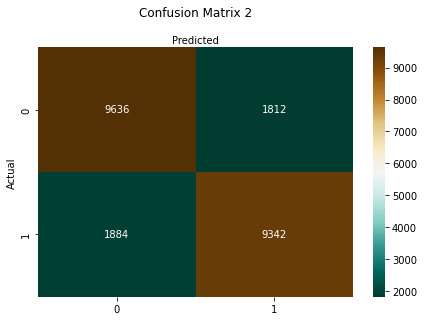

In [38]:
cm=confusion_matrix(y_test_final,y_pred)
class_name=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_name))
plt.xticks(tick_marks,class_name)
plt.yticks(tick_marks,class_name)

sns.heatmap(pd.DataFrame(cm),annot=True,cmap='BrBG_r',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix 2',y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Compute precision, recal, F-measure and support

In [39]:
clas_report=classification_report(y_test_final,y_pred)
print(clas_report)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     11448
           1       0.84      0.83      0.83     11226

    accuracy                           0.84     22674
   macro avg       0.84      0.84      0.84     22674
weighted avg       0.84      0.84      0.84     22674



ROC Curve

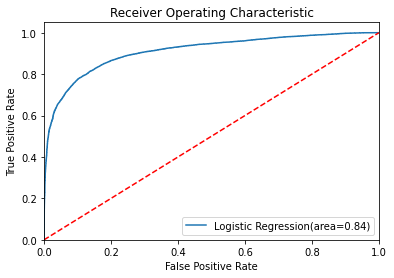

In [40]:
logit_roc_auc=roc_auc_score(y_test_final,y_pred)
fpr,tpr,thresholds=roc_curve(y_test_final,logreg.predict_proba(X_test_final)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="Logistic Regression(area=%0.2f)"% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()